In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
covid = pd.read_csv("worldometer_data.csv")

In [3]:
covid.head(3)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [5]:
covid.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [6]:
covidClean = covid.drop(columns=["NewCases","NewDeaths","NewRecovered"])

In [7]:
covidClean.head(3)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia


In [8]:
top15 = covidClean.head(15) 

<Figure size 1008x72 with 0 Axes>

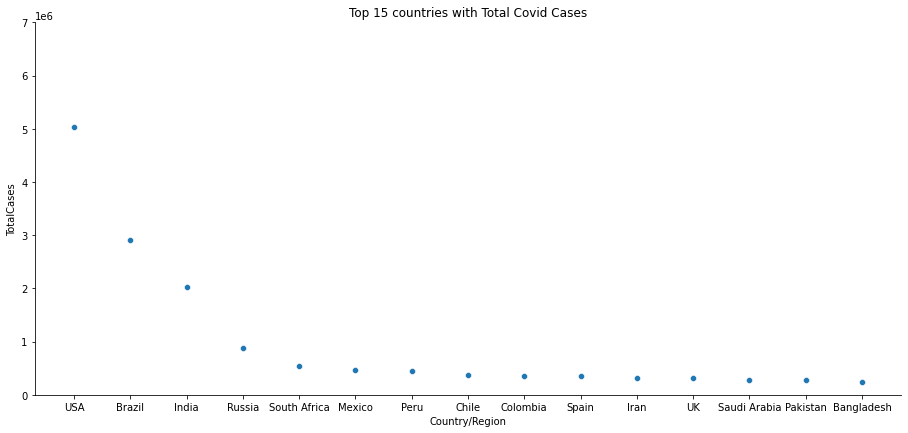

In [39]:
plt.figure(figsize=(14,1))
ax = sns.relplot(x  = "Country/Region", y = "TotalCases",  data = top15 ).set(ylim=(0,7000000)).set(title = "Top 15 countries with Total Covid Cases")
ax.fig.set_figwidth(14)
ax.fig.set_figheight(6)


Text(0.5, 1.0, 'Recover vs Death')

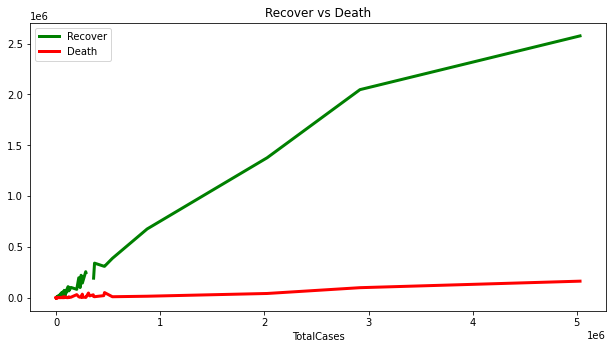

In [10]:
x = covid.TotalCases
y1 = covid.TotalRecovered
y2 = covid.TotalDeaths

fig = plt.figure(figsize=(8,4))


ax1 = fig.add_axes([0,0,1,1])

ax1.set_xlabel("TotalCases")

ax1.plot(x,y1,linewidth = 3,color = 'g')
ax1.plot(x,y2,linewidth = 3,color = 'r')
ax1.legend(["Recover","Death"])
ax1.set_title("Recover vs Death")


In [11]:
contcovid = covid.groupby("Continent").sum()

In [12]:
contcovid.head()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Continent,,,,,,,,,,,,,
Africa,1.343515e+09,1011867,0.0,22114.0,0.0,693620.0,0.0,296133.0,1187.0,64456.0,1003.28,8673853.0,806042.0
Asia,3.173656e+09,4689794,20.0,100627.0,1.0,3508170.0,42.0,1080997.0,18749.0,192429.0,1846.80,65353821.0,3433453.0
Australia/Oceania,4.095791e+07,21735,0.0,281.0,0.0,12620.0,0.0,8834.0,52.0,1446.0,15.30,5152811.0,347083.0
Europe,7.476775e+08,2982576,0.0,205232.0,0.0,1587302.0,0.0,475261.0,5200.0,209454.0,9673.00,96125611.0,8286140.0
North America,5.895035e+08,5919209,6620.0,229855.0,819.0,3151678.0,4140.0,2537676.0,25709.0,88547.0,3097.00,70173584.0,2069875.0


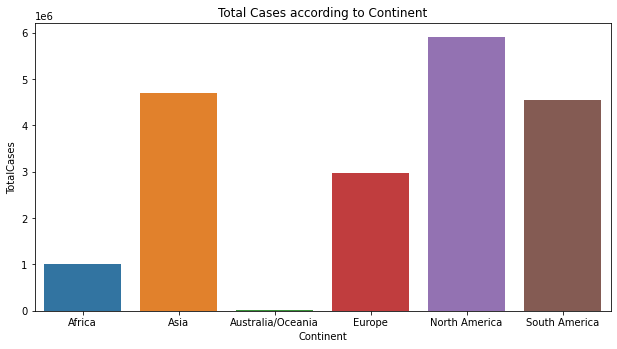

In [13]:
x2 = contcovid.index
y2 = contcovid.TotalCases

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

axes = sns.barplot(x=x2, y=y2, data=contcovid).set(title = "Total Cases according to Continent")

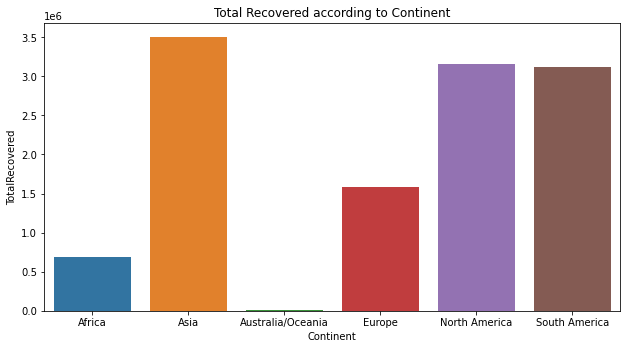

In [14]:
x2 = contcovid.index
y2 = contcovid.TotalRecovered

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

axes = sns.barplot(x=x2, y=y2, data=contcovid).set(title = "Total Recovered according to Continent")

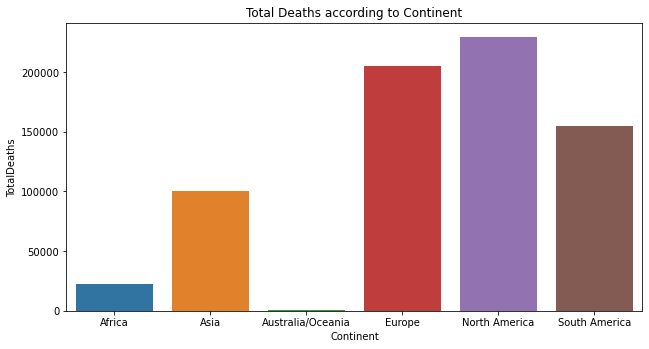

In [15]:
x2 = contcovid.index
y2 = contcovid.TotalDeaths

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

axes = sns.barplot(x=x2, y=y2, data=contcovid).set(title = "Total Deaths according to Continent")

In [16]:
covidClean["RecovryRate"] = covidClean.TotalRecovered / covidClean.TotalCases
covidClean["DeathRate"] = covidClean.TotalDeaths / covidClean.TotalCases

In [17]:
top10 = covidClean.head(10)

In [18]:
top10.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,RecovryRate,DeathRate
count,1.000000e+01,1.000000e+01,10.00000,9.000000e+00,9.000000e+00,10.000000,10.000000,10.000000,1.000000e+01,10.000000,9.000000,10.000000
mean,2.409484e+08,1.338224e+06,44856.50000,9.130103e+05,4.878389e+05,4727.800000,9656.100000,361.900000,1.455390e+07,88762.000000,0.689305,0.041608
std,4.123389e+08,1.559496e+06,49638.36938,8.788422e+05,7.228317e+05,5660.496794,5615.108319,214.728485,1.969221e+07,70128.037479,0.122683,0.030064
min,1.913251e+07,3.545300e+05,9604.00000,1.923550e+05,1.661400e+04,539.000000,1466.000000,30.000000,1.056915e+06,8189.000000,0.512038,0.016752
25%,4.780155e+07,3.888555e+05,12605.75000,3.103370e+05,1.246480e+05,1375.000000,6236.250000,180.000000,1.974734e+06,39791.500000,0.667505,0.022161
50%,9.422386e+07,5.004370e+05,24462.00000,3.873160e+05,1.534160e+05,1896.500000,8322.500000,427.500000,5.107068e+06,68803.000000,0.681447,0.032864
75%,1.960182e+08,1.737030e+06,48297.25000,1.377384e+06,6.063870e+05,7235.250000,13773.750000,510.750000,1.991356e+07,136320.750000,0.719672,0.042088
max,1.381345e+09,5.032179e+06,162804.00000,2.576668e+06,2.292707e+06,18296.000000,19165.000000,619.000000,6.313960e+07,203623.000000,0.927720,0.109181


In [19]:
top10.head(2)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,RecovryRate,DeathRate
0,USA,North America,331198130.0,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,0.512038,0.032353
1,Brazil,South America,212710692.0,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,0.701839,0.033810


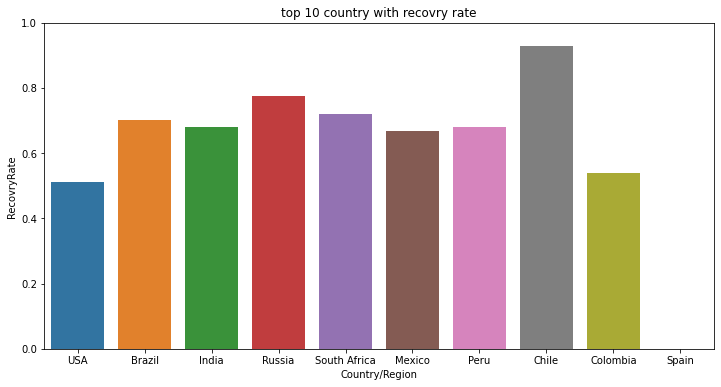

In [20]:
fig = plt.figure(figsize = (12,6))


ax1 = sns.barplot(x = "Country/Region",y = "RecovryRate" , data = top10).set(ylim=(0,1),title = "top 10 country with recovry rate")
#ax1.fig.set_figwidth(14)

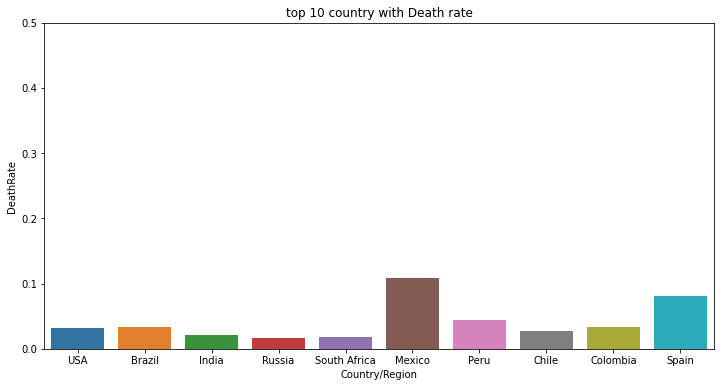

In [21]:
figu = plt.figure(figsize = (12,6))
ax1 = sns.barplot(x = "Country/Region",y = "DeathRate" , data = top10).set(ylim=(0,0.5),title = "top 10 country with Death rate")

In [28]:
w = 0.25
 
y1 = top10.DeathRate
y2 = top10.RecovryRate

lenn = top10["Country/Region"]
x1 = np.arange(len(lenn))
x2 = [i+w for i in x1]

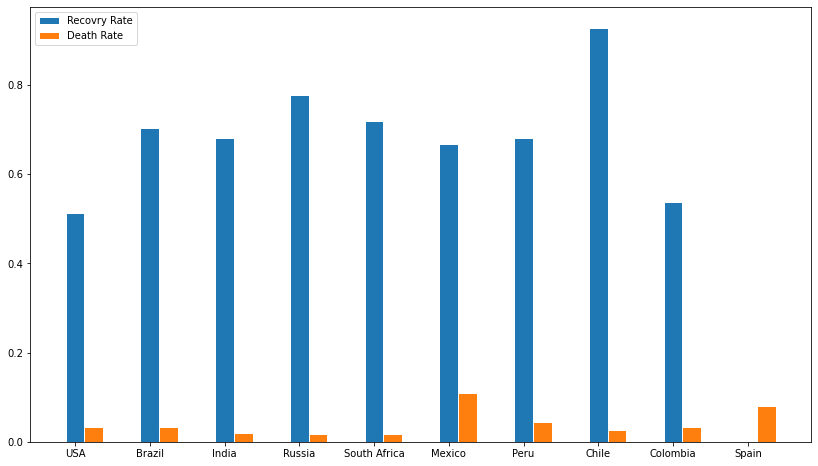

In [41]:
plt.figure(figsize=(14,8))
plt.bar(x1, y2,width=w,edgecolor='white', label='Recovry Rate')
plt.bar(x2, y1,width=w,edgecolor='white', label='Death Rate')

plt.xticks(x1,lenn)

plt.legend()

<AxesSubplot:>

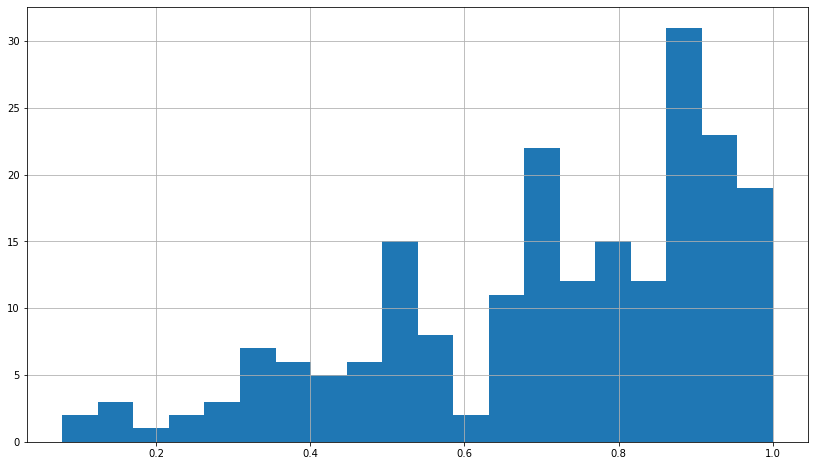

In [24]:
plt.figure(figsize=(14,8))
covidClean.RecovryRate.hist(bins = 20)

<AxesSubplot:>

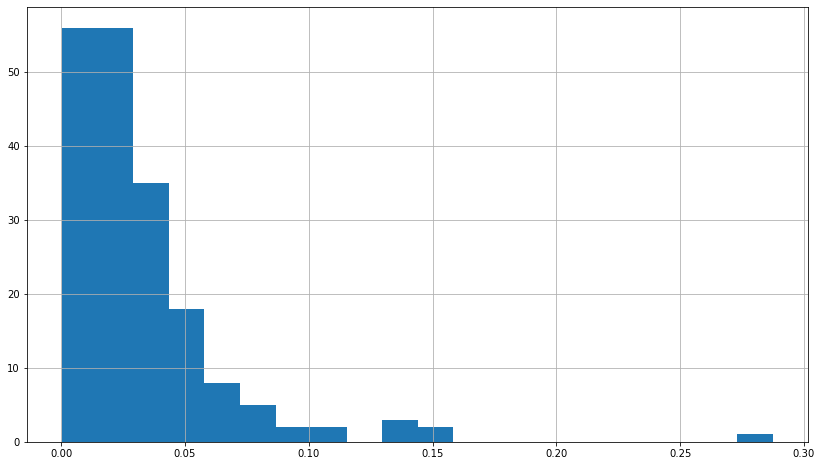

In [25]:
plt.figure(figsize=(14,8))
covidClean.DeathRate.hist(bins = 20)